# Getting started with INTEGRATE - with no forward code

This notebook contains a simple example of geeting started with INTEGRATE

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    #%load_ext autoreload
    #%autoreload 2
    pass

In [2]:
import integrate as ig



In [3]:
case = 'DAUGAARD'

files = ig.get_case_data(case=case,  loadType='prior_data')
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
File DAUGAARD_AVG.h5 already exists. Skipping download.
File TX07_20231016_2x4_RC20-33.gex already exists. Skipping download.
File README_DAUGAARD already exists. Skipping download.
File prior_detailed_invalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5 already exists. Skipping download.
File prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5 already exists. Skipping download.
Checking if file exists on the remote server...
File prior_detailed_general_N2000000_dmax90.h5_TX07_20231016_2x4_RC20-33_Nh280_Nf12 does not exist on the remote server. Skipping download.
File prior_detailed_inout_N4000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5 already exists. Skipping download.
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model, $\rho(\mathbf{m},\mathbf{d})$

In this example we assume that realization of both 'm' and 'd' are avala simple layered prior model will be considered

c:\users\thoma\programming\integrate_module\integrate\integrate_plot.py:984: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['$10^{%3.1f}$'%i for i in ax[0,1].get_xticks()])
c:\users\thoma\programming\integrate_module\integrate\integrate_plot.py:1042: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['$10^{%3.1f}$'%i for i in ax[0,1].get_xticks()])


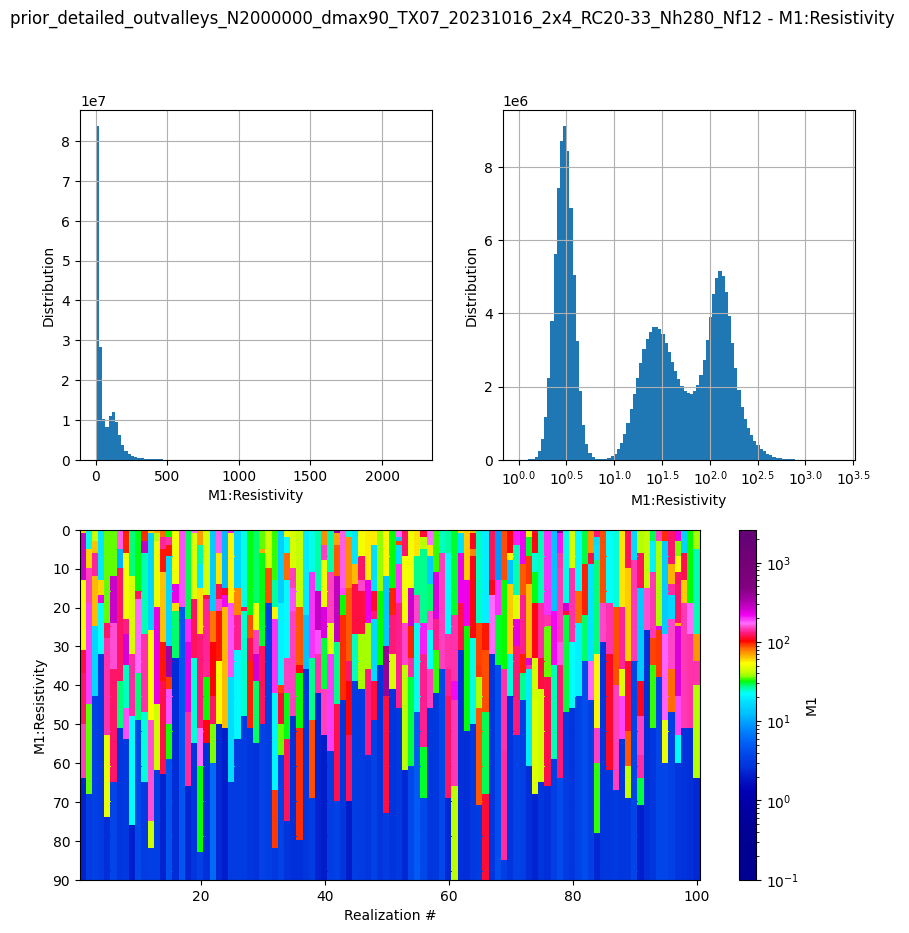

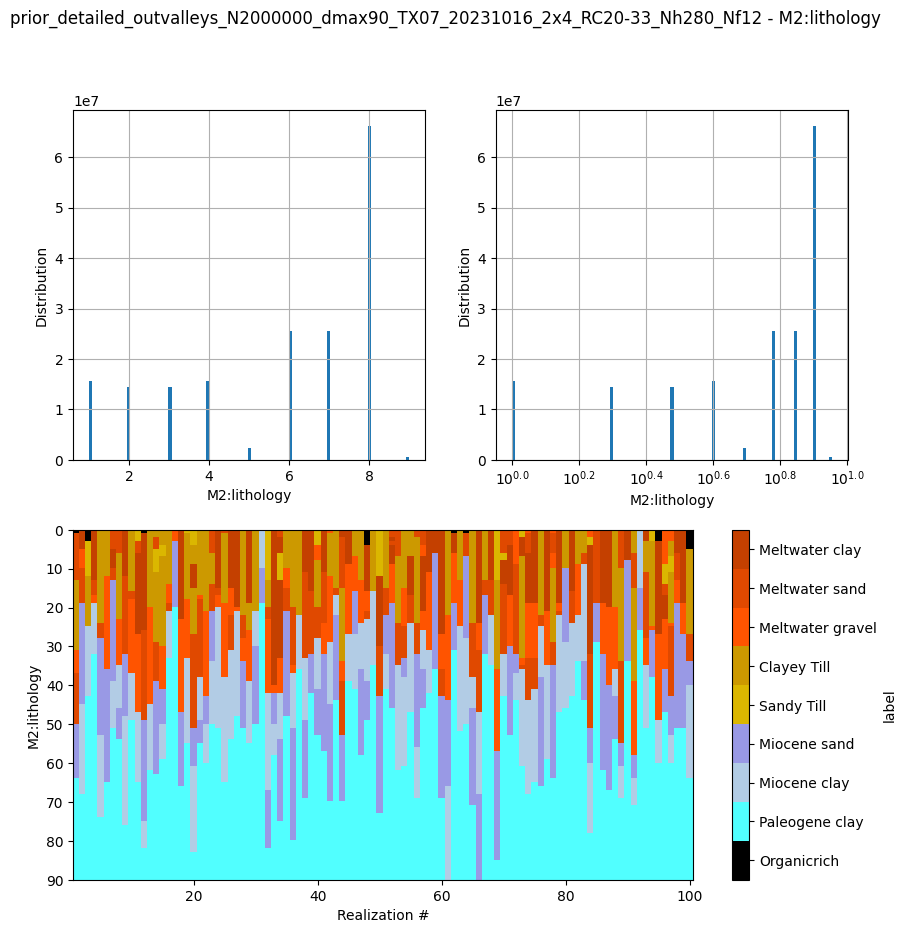

In [4]:
f_prior_h5 = 'prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5'
ig.plot_prior_stats(f_prior_h5)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [5]:
N_use = 1000
f_post_h5 = ig.integrate_rejection(f_prior_h5, f_data_h5, N_use = N_use, parallel=1, updatePostStat=False, showInfo=1)

Running: integrate_rejection.py prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5 DAUGAARD_AVG.h5 --autoT 1 --N_use 1000 --ns 400 -parallel 1 --updatePostStat 0
wnsm_a3171e5d
File POST_DAUGAARD_AVG_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5 allready exists
Overwriting...
nsoundings:11693, N_use:1000, nd:40
Writing results to  POST_DAUGAARD_AVG_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5
Using 8 parallel threads.


100%|██████████████████████████████████████████████████████████████████████████| 11693/11693 [00:07<00:00, 1582.17it/s]

T_av=106.8, Time=  7.5s/11693 soundings ,0.642ms/sounding
Writing to file:  POST_DAUGAARD_AVG_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5


In [9]:
ig.integrate_posterior_stats(f_post_h5)

D1
M1
M2
Creating /M1/Mean
Creating /M1/Median
Creating /M1/Std


100%|███████████████████████████████████████████████████████████████| 11693/11693 [00:10<00:00, 1152.97it/s]


Creating /M2/Mode
Creating /M2/Entropy
Creating /M2/P


100%|███████████████████████████████████████████████████████████████| 11693/11693 [00:08<00:00, 1431.30it/s]


### Plot some statistic from $\sigma(\mathbf{m})$

i_use[0]=457
457
2000000
21.50651351852116
i_use[0]=726
726
2000000
103.93536660014499


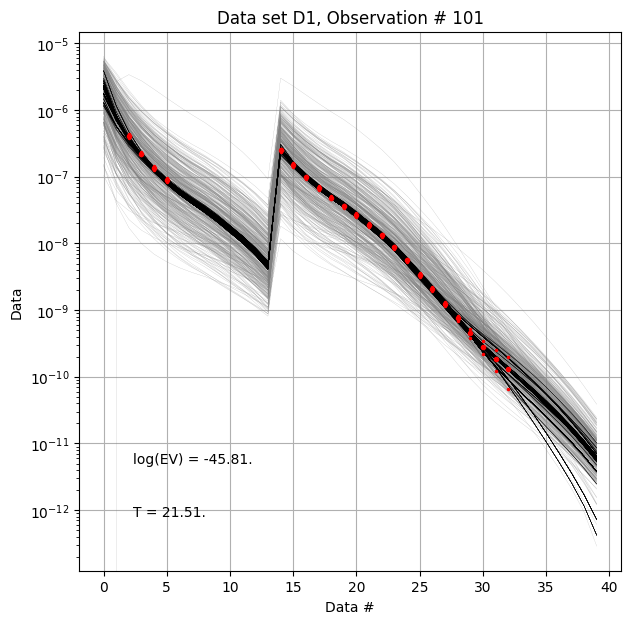

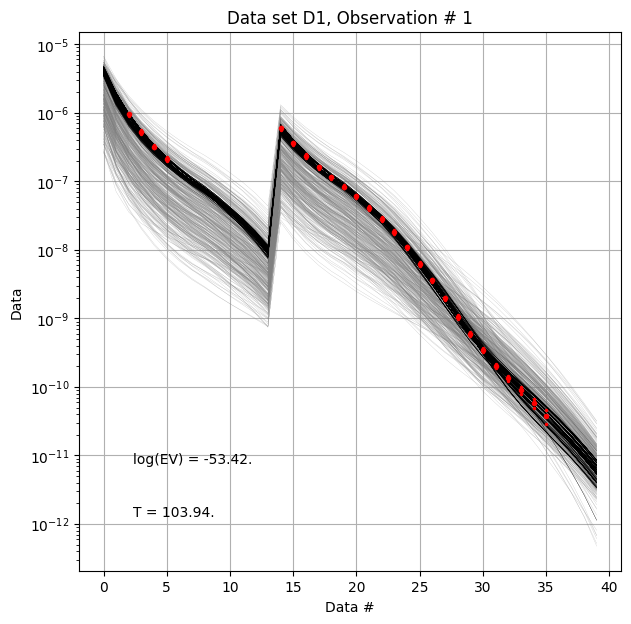

In [10]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

(1, 100)


1

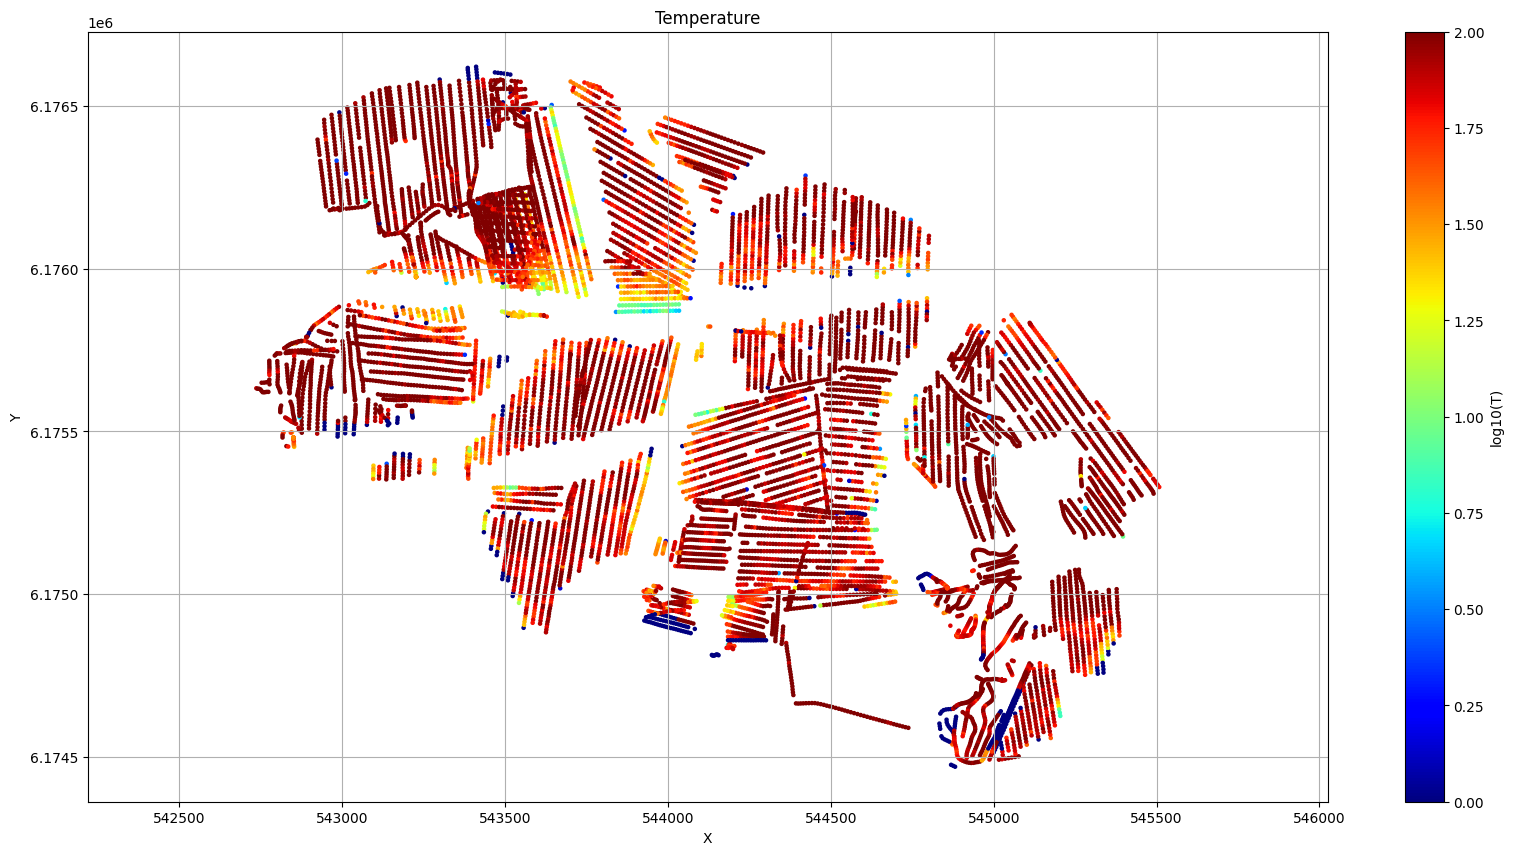

In [11]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T')

1
Plotting profile /M1 from POST_DAUGAARD_AVG_prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5
[1.0e-01 2.6e+03]
[1.0e-01 2.6e+03]


/mnt/c/Users/thoma/PROGRAMMING/integrate_module/integrate/integrate_plot.py:588: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1 = ax[0].pcolormesh(ID[:,i1:i2], ZZ[:,i1:i2], Mean[:,i1:i2],
/mnt/c/Users/thoma/PROGRAMMING/integrate_module/integrate/integrate_plot.py:597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2 = ax[1].pcolormesh(ID[:,i1:i2], ZZ[:,i1:i2], Median[:,i1:i2],
/mnt/c/Users/thoma/PROGRAMMING/integrate_module/integrate/integrate_plot.py:607: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or d

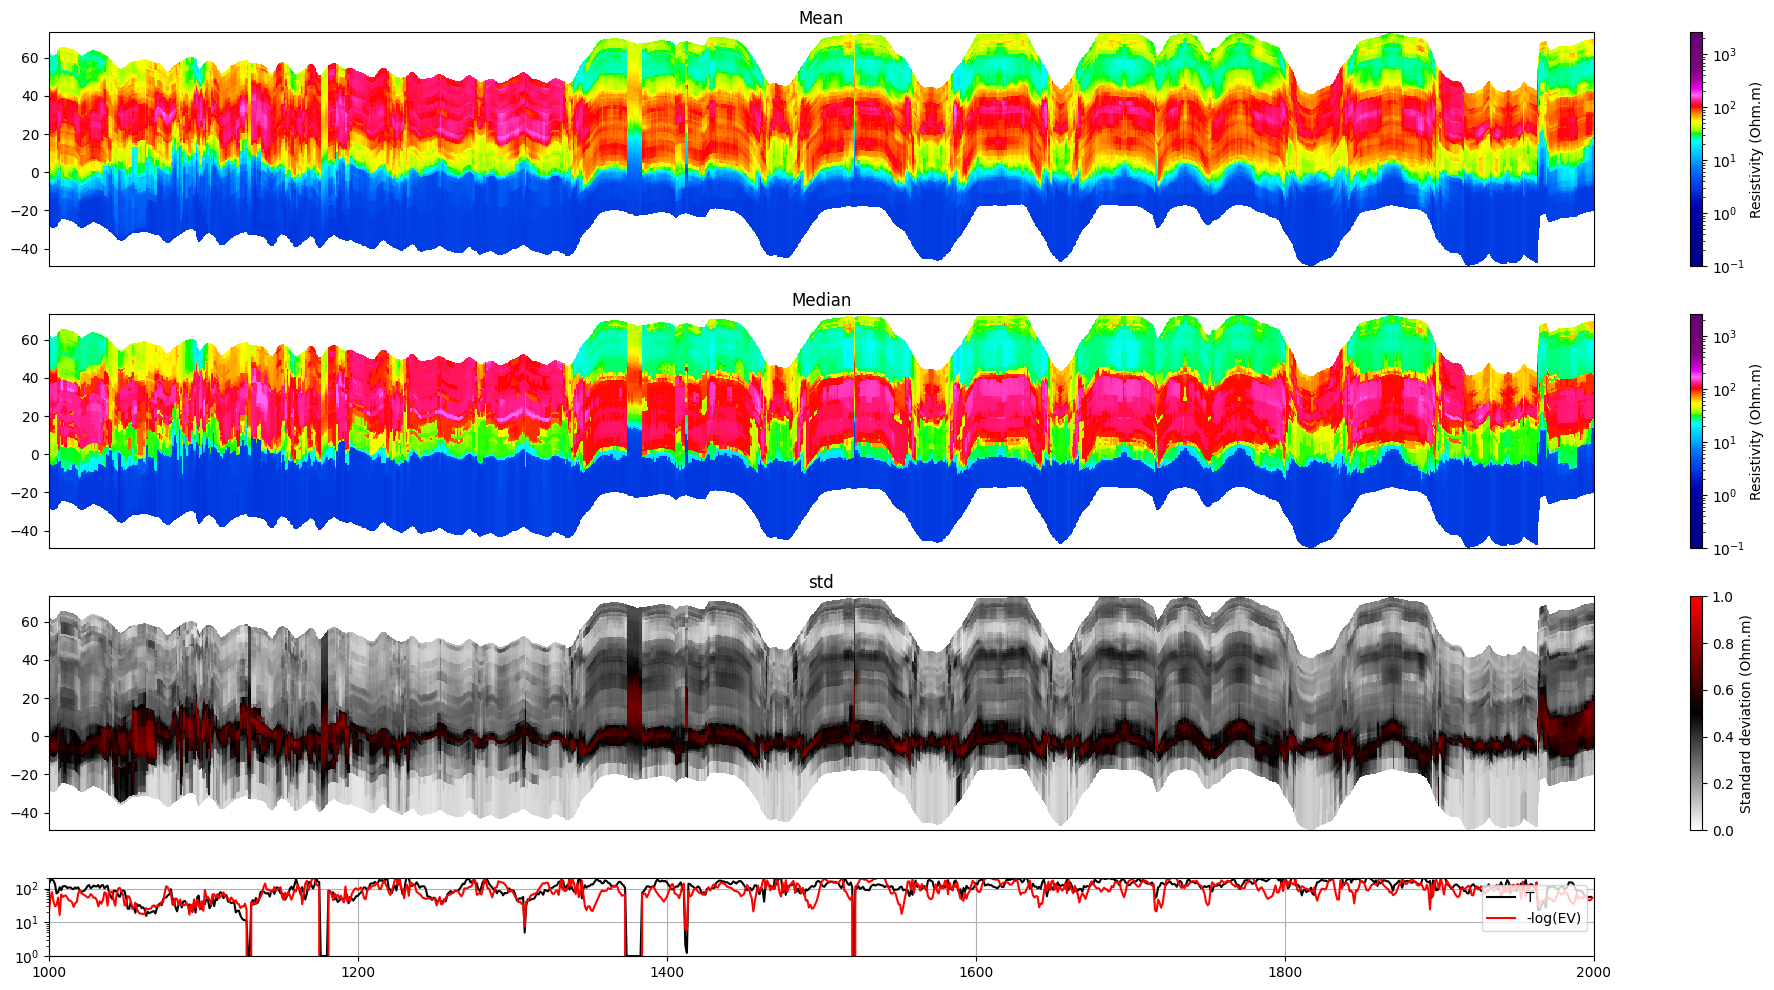

In [12]:
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1)

prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
[1.0e-01 2.6e+03]
jet
Plotting Feature 12 from /M1/Median
(11693,)


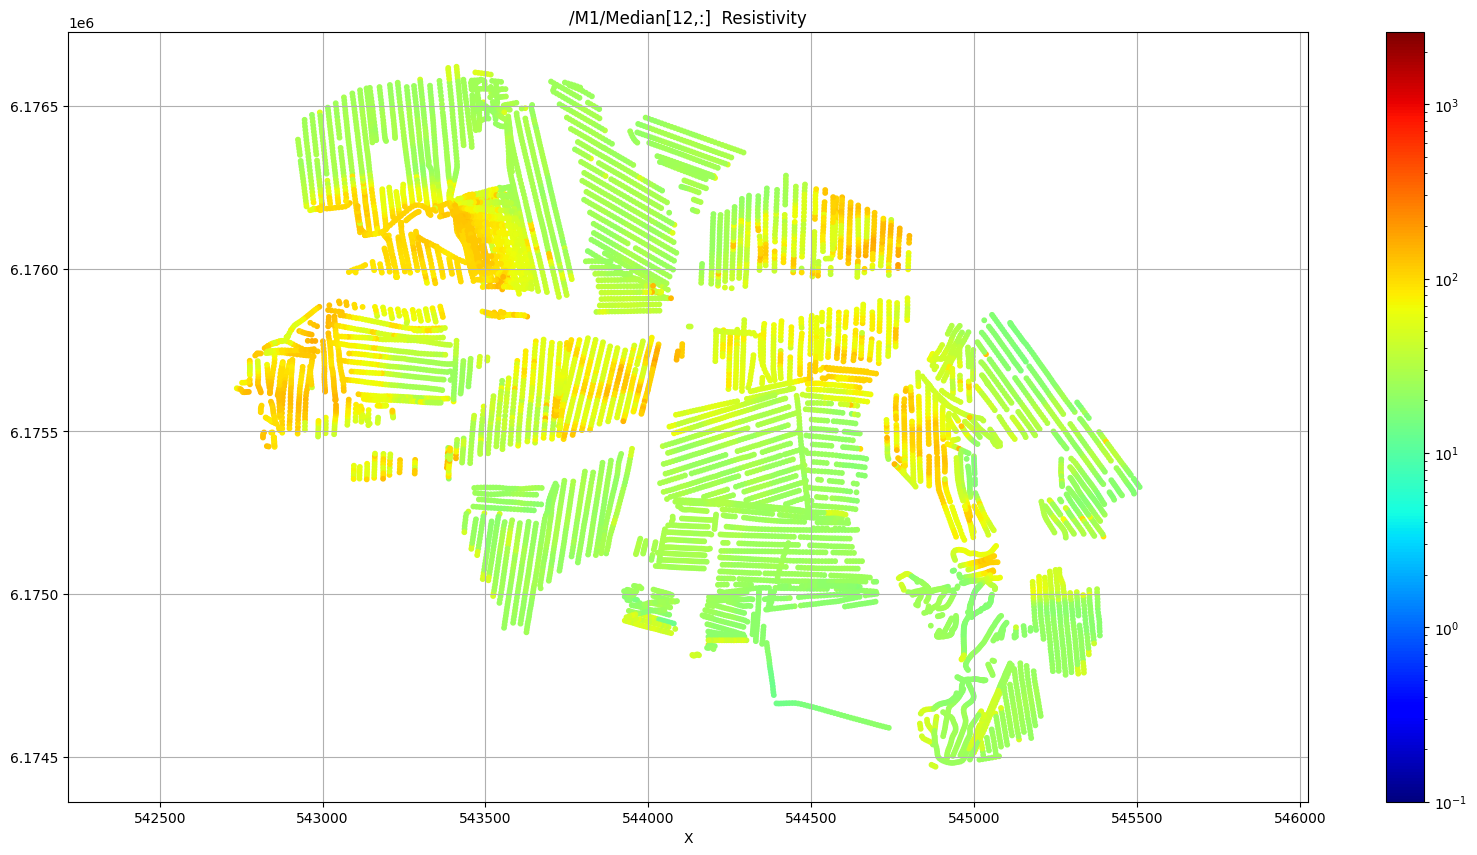

prior_detailed_outvalleys_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
[1, 6]
jet
Plotting Feature 0 from /M2/Median
Key Median not found in /M2


In [13]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=12, key='Median', uselog=1, cmap='jet', s=10)
#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Median', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=12)
except:
    pass